 **Veri Madenciliği Uygulamaları Dersi - BIL542**

---


**Dilara Saruhan** ⭐

---






**Problem**

Bir sağlık uygulamasında, bir hastanın kardiyovasküler hastalık (KVH) riskini belirlemek için bir karar ağacı modeli oluşturulmuştur. Model, bir dizi sağlık ölçütü ve yaş bilgisini kullanarak hastaları "Yüksek Risk" ve "Düşük Risk" olarak sınıflandırmaktadır.



*   KNN
*   NAIVE BAYES
*   C4.5 KARAR AĞACI Kullanarak oluşturacağınız model ile aşağıdaki soruya cevap vereceğiz;

45 yaşında bir hasta, normal kan basıncı, düşük kolesterol seviyesi, sigara içmiyor ve düzenli egzersiz yapıyor. Bu hastanın kardiyovasküler hastalık riski nedir?


---



In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**KNN İLE HESAPLAMA**

---



K-En Yakın Komşular (K-Nearest Neighbors, k-NN), genellikle sınıflandırma ve regresyon problemleri için kullanılan basit ve güçlü bir makine öğrenimi algoritmasıdır. Temel prensibi, veri noktalarının çevresindeki k-en yakın komşuya bakarak tahminlerde bulunmaktır. İşleyiş mantığı şu adımlarla açıklanabilir:

1. Veri Kümesi ve Noktaların Konumu:
K-NN'nin çalışabilmesi için bir veri kümesi gereklidir. Bu veri kümesi, etiketlenmiş örnekleri içerir (sınıflandırma için) veya çiftler halinde giriş ve çıkışları içerir (regresyon için).
Her bir örnek, bir veya daha fazla özellikten oluşur.
2. Mesafe Hesaplama:
Veri kümesindeki her bir noktanın diğer noktalara olan mesafesi hesaplanır. Mesafe ölçüsü genellikle Euclidean mesafesi kullanılır, ancak başka mesafe metrikleri de tercih edilebilir.
3. K Komşuların Belirlenmesi:
Tahmin yapılacak yeni bir nokta verildiğinde, bu noktanın en yakın k komşusunu belirlemek için önceden hesaplanan mesafeler kullanılır.
4. Sınıflandırma veya Regresyon:
Sınıflandırma durumunda, en yakın k komşunun etiketleri incelenir ve yeni noktanın etiketi, çoğunluğun etiketi olur (örneğin, en fazla sayıda sınıf).
Regresyon durumunda, en yakın k komşunun çıkış değerleri kullanılarak yeni noktanın tahmini değeri elde edilir, genellikle bu değerlerin ortalaması alınır.
5. Sonuç:
K-NN, yeni noktanın sınıfını (sınıflandırma) veya tahminini (regresyon) verir.

Parametre K:
Modelin performansını etkileyen önemli bir parametre k'dir. K, komşuların sayısını belirtir. Bu değer genellikle tek bir sayıdır ve genellikle uygulayıcı tarafından belirlenir. K'nin değeri küçükse modelin daha karmaşık ve gürültülü veriye duyarlı hale gelirken, büyükse genelleme yeteneği artar ancak aşırı uyum riski artar.
K-NN'nin avantajları arasında basit olması, eğitim sürecinin olmaması ve yeni veri noktalarına hızlı bir şekilde uygulanabilmesi bulunmaktadır. Ancak, büyük veri setleri üzerinde performansı düşük olabilir ve özellikle yüksek boyutlu veri setlerinde etkili olmayabilir.

---
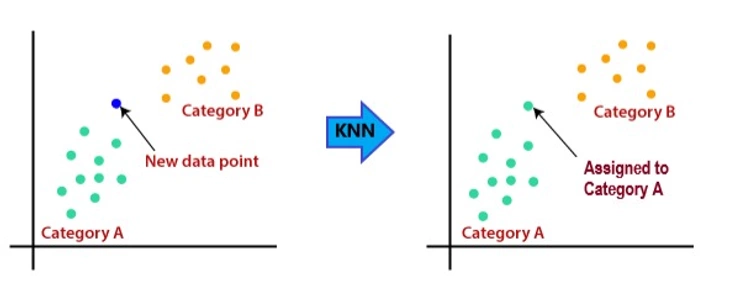









In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# CSV dosyasını okuma
path = "/content/drive/MyDrive/Veri_Seti/Veri_Seti.csv"
Veri_Seti = pd.read_csv(path)

# Veri setindeki kategorik özellikleri one-hot encode yapma
Veri_Seti_encoded = pd.get_dummies(Veri_Seti, columns=['Kan_Basinci', 'Kolesterol', 'Sigara', 'Egzersiz'], drop_first=True)

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayarlama
X = Veri_Seti_encoded.drop('KHR', axis=1)
y = Veri_Seti_encoded['KHR']

# K-En Yakın Komşular modelini oluşturma ve eğitme
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X, y)

# Yeni hastanın özelliklerini içeren DataFrame'i oluştur
new_patient_features = pd.DataFrame([[45, 'Normal', 'Düşük', 'Hayır', 'Düşük']],
                                    columns=['Yas', 'Kan_Basinci', 'Kolesterol', 'Sigara', 'Egzersiz'])

# Veriyi one-hot encode yapma
new_patient_features_encoded = pd.get_dummies(new_patient_features, columns=['Kan_Basinci', 'Kolesterol', 'Sigara', 'Egzersiz'], drop_first=True)

# Eksik sütunları ekleyerek sırasını düzenleme
for col in ['Kan_Basinci_Yüksek', 'Kolesterol_Normal', 'Sigara_Evet', 'Egzersiz_Yüksek']:
    if col not in new_patient_features_encoded.columns:
        new_patient_features_encoded[col] = 0

# X DataFrame'inden alınan sütunları kontrol ederek filtreleme
new_patient_features_encoded = new_patient_features_encoded.reindex(columns=X.columns, fill_value=0)

# Yeni hastanın kardiyovasküler hastalık riskini tahmin etme
predicted_risk = knn_model.predict(new_patient_features_encoded)[0]
# Eğitim verisi üzerinde tahmin yapma
y_pred_train = knn_model.predict(X)

# Eğitim verisi üzerinde doğruluk hesaplama
accuracy_train = accuracy_score(y, y_pred_train)

# Modelin doğruluğunu ekrana yazdırma
print(f"Eğitim verisi üzerinde K-En Yakın Komşular modelinin doğruluğu: {accuracy_train}")

# Tahmin sonucunu ekrana yazdırma
print(f"45 yaşında, normal kan basıncı, düşük kolesterol seviyesi, sigara içmeyen ve düzenli egzersiz yapan bir hastanın KVH riski(KHR): {predicted_risk}")


Eğitim verisi üzerinde K-En Yakın Komşular modelinin doğruluğu: 0.8860759493670886
45 yaşında, normal kan basıncı, düşük kolesterol seviyesi, sigara içmeyen ve düzenli egzersiz yapan bir hastanın KVH riski(KHR): Yüksek


**NAIVE BAYES İLE HESAPLAMA**

---



Naive Bayes, olasılık temelli bir sınıflandırma (classification) algoritmasıdır ve özellikle metin madenciliği (text mining) ve spam filtreleme gibi uygulamalarda sıkça kullanılır. Algoritma, Bayes Teoremi'ne dayanır ve "naive" (saf) olarak adlandırılır, çünkü sınıf etiketleri arasındaki bağımsızlık varsayımını yapar. Yani, verilen bir örnek içindeki özelliklerin birbirinden bağımsız olduğunu varsayar. Bu varsayım, modelin basitleştirilmesine ve eğitim sürecinin hızlanmasına yardımcı olur.

İşleyiş mantığı şu adımlarla açıklanabilir:

1. Veri Kümesi ve Özellikler:
Her bir örnek, bir dizi özelliğe sahiptir ve bir sınıf etiketine atanmıştır. Örneğin, bir e-postanın spam olup olmadığını belirlemek için e-postanın içerdiği kelimeler özellikler olarak kullanılabilir.
2. Olayların Olasılıkları:
Sınıf etiketlerinin ve özelliklerin olasılıkları hesaplanır. Bu adım, eğitim verileri üzerinde gerçekleşir. Örneğin, bir e-postanın içinde belirli bir kelimenin bulunma olasılığı.
3. Bayes Teoremi:
Bayes Teoremi, bir olayın gerçekleşme olasılığını hesaplamak için kullanılır. Naive Bayes, bu teoremi sınıflandırma problemi için uygular.
4. Tahmin:
Test verileri üzerinde özelliklerin olasılıkları kullanılarak sınıf etiketleri tahmin edilir. Örneğin, bir e-postanın spam olup olmadığını belirleme.

Avantajlar:
Basit ve hızlıdır.
İyi performans gösterir, özellikle metin madenciliği ve doğal dil işleme uygulamalarında.
Relatif olarak az sayıda parametreye ihtiyaç duyar.

---





In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# CSV dosyasını okuma
path = "/content/drive/MyDrive/Veri_Seti/Veri_Seti.csv"
Veri_Seti = pd.read_csv(path)

# Kategorik sütunları sayısal sütunlara dönüştürme
Veri_Seti_encoded = pd.get_dummies(Veri_Seti, columns=['Kan_Basinci', 'Kolesterol', 'Sigara', 'Egzersiz'], drop_first=True)

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayarlama
X = Veri_Seti_encoded.drop("KHR", axis=1)
y = Veri_Seti_encoded["KHR"]

# Eğitim ve test verilerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes modelini oluşturma ve eğitme
model = GaussianNB()
model.fit(X_train, y_train)

# Test verileri ile tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk değerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Eğitim verisi üzerinde Naive Bayes modelinin doğruluğu: {accuracy}")

# Yeni hastanın özelliklerini içeren DataFrame'i oluştur
new_patient_features = pd.DataFrame([[45, 'Normal', 'Düşük', 'Hayır', 'Yüksek']],
                                    columns=['Yas', 'Kan_Basinci', 'Kolesterol', 'Sigara', 'Egzersiz'])

# Veriyi one-hot encode yapma
new_patient_features_encoded = pd.get_dummies(new_patient_features, columns=['Kan_Basinci', 'Kolesterol', 'Sigara', 'Egzersiz'], drop_first=True)

# Eksik sütunları ekleyerek sırasını düzenleme
for col in X.columns:
    if col not in new_patient_features_encoded.columns:
        new_patient_features_encoded[col] = 0

# X_train'deki sıraya göre sıralama
new_patient_features_encoded = new_patient_features_encoded[X_train.columns]

# Yeni hastanın kardiyovasküler hastalık riskini tahmin etme
predicted_risk = model.predict(new_patient_features_encoded)[0]

# Tahmin sonucunu ekrana yazdırma
print(f"45 yaşında, normal kan basıncı, düşük kolesterol seviyesi, sigara içmeyen ve düzenli egzersiz yapan bir hastanın KVH riski(KHR): {predicted_risk}")


Eğitim verisi üzerinde Naive Bayes modelinin doğruluğu: 0.625
45 yaşında, normal kan basıncı, düşük kolesterol seviyesi, sigara içmeyen ve düzenli egzersiz yapan bir hastanın KVH riski(KHR): Yüksek


**C4.5 KARAR AĞACI İLE HESAPLAMA**

---

C4.5, Ross Quinlan tarafından geliştirilen bir karar ağacı algoritmasıdır. Bu algoritma, sınıflandırma problemleri için kullanılır ve veri madenciliği, yapay zeka ve örüntü tanıma gibi birçok uygulama alanında yaygın olarak kullanılmıştır. C4.5, özellikle veri kümesindeki özellikler arasındaki bağlantıları ve kararlar arasındaki ilişkileri keşfetmek için kullanılır.

İşleyiş mantığı şu adımlarla açıklanabilir:

1. Entropi ve Bilgi Kazancı:
C4.5, her bir özelliğin sınıflandırma sürecine katkısını ölçen entropi ve bilgi kazancı (information gain) kavramlarını kullanır.
Entropi, belirli bir durumun belirsizliğini ölçen bir terimdir. Düşük entropi, düzenli ve düzenli bir durumu, yüksek entropi ise rastgele ve düzensiz bir durumu temsil eder.
Bilgi kazancı, bir özellik eklenmeden önceki entropi ile özellik eklenip sonraki entropi arasındaki farktır. Yüksek bilgi kazancı, özelliğin önemli olduğunu gösterir.
2. Karar Ağacı Oluşturma:
C4.5, özellikler arasında bilgi kazancına dayanarak bir kök düğüm (root node) seçer. Her düğüm, bir özelliği temsil eder ve bu özelliklere göre alt düğümlere ayrılır.
Sürekli özellikler, eşik değerine göre ayrılır.
Karar ağacı, bilgi kazancı en yüksek olan özelliklere göre oluşturulur.
3. Ağacın Büyütülmesi ve Budama:
C4.5, ağacın aşırı öğrenmesini önlemek için budama yapar. Bu, gereksiz dalları ve düğümleri kaldırarak modelin daha genelleştirilebilir olmasını sağlar.
Ağacın yapısı, veri kümesine ve probleme özgüdür.

Avantajlar:
İnsan tarafından anlaşılabilir bir karar ağacı modeli oluşturur.
Hem kategorik hem de sayısal verilerle çalışabilir.
Aşırı uydurmaya karşı dirençlidir.

Dezavantajlar:
Bazı durumlarda diğer algoritmalar kadar hassas olmayabilir.
Küçük veri setlerinde aşırı uyuma eğilimlidir.
Karar ağacının büyüklüğü, veri kümesinin boyutu ve karmaşıklığına bağlı olarak artabilir.

C4.5, genellikle sınıflandırma problemleri için başarılı bir seçenek olarak kabul edilir ve özellikle açık ve anlaşılır bir karar ağacı gerektiren durumlarda tercih edilir.

---





In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# CSV dosyasını okuma
path = "/content/drive/MyDrive/Veri_Seti/Veri_Seti.csv"
Veri_Seti = pd.read_csv(path)

# Veri setindeki kategorik özellikleri one-hot encode yapma
Veri_Seti_encoded = pd.get_dummies(Veri_Seti, columns=['Kan_Basinci', 'Kolesterol', 'Sigara', 'Egzersiz'], drop_first=True)

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayarlama
X = Veri_Seti_encoded.drop("KHR", axis=1)
y = Veri_Seti_encoded["KHR"]

# Eğitim ve test verilerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar ağacı modelini oluşturma ve eğitme
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)

# Test verileri ile tahmin yapma
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Eğitim verisi üzerinde Karar Ağacı modelinin doğruluğu: {accuracy}")

# Yeni bir hastanın riskini tahmin etme
new_patient = pd.DataFrame([[45, 'Normal', 'Düşük', 'Hayır', 'Yüksek']],
                            columns=['Yas', 'Kan_Basinci', 'Kolesterol', 'Sigara', 'Egzersiz'])

# Veriyi one-hot encode yapma
new_patient_encoded = pd.get_dummies(new_patient, columns=['Kan_Basinci', 'Kolesterol', 'Sigara', 'Egzersiz'], drop_first=True)

# Eksik sütunları ekleyerek sırasını düzenleme
for col in X.columns:
    if col not in new_patient_encoded.columns:
        new_patient_encoded[col] = 0

# X_train'deki sıraya göre sıralama
new_patient_encoded = new_patient_encoded[X_train.columns]

# Yeni hastanın kardiyovasküler hastalık riskini tahmin etme
predicted_risk = model.predict(new_patient_encoded)[0]

# Tahmin sonucunu ekrana yazdırma
if predicted_risk == 0:
    print("Yeni hastanın kardiyovasküler hastalık riski Düşük.")
else:
    print("Yeni hastanın kardiyovasküler hastalık riski: Yüksek.")


Eğitim verisi üzerinde Karar Ağacı modelinin doğruluğu: 0.8125
Yeni hastanın kardiyovasküler hastalık riski: Yüksek.
